## We use the **TensorFlow** framework to develop a multi-class classification problem on the MNIST handwritten digits dataset.

### (http://yann.lecun.com/exdb/mnist/)


1. We make observations on the model's loss on the minibatches during training.
2. Plot the classification error on the Validation set
2. We **train and compare** different neural networks to understand the significance of **Regularization** (*L2 and Dropout*).

In [ ]:
## Import the necessary libraries
import tensorflow as tf
print("TensorFlow Version: ",tf.__version__)

TensorFlow Version:  2.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Data Preprocessing**

Load the data into memory

In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

 **Let us define some helper functions**

In [ ]:
def plot_results(history):
    plt.figure(figsize=(12, 4))
    epochs = len(history['val_loss'])
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.plot(range(epochs), history['loss'], label='Train Loss')
    #plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['val_accuracy'], label='Val Accuracy')
    plt.plot(range(epochs), history['accuracy'], label='Train Accuracy')
    #plt.xticks(list(range(epochs)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt

In [ ]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=10):

  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(500)

## **Create the first Neural Network**

In [ ]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

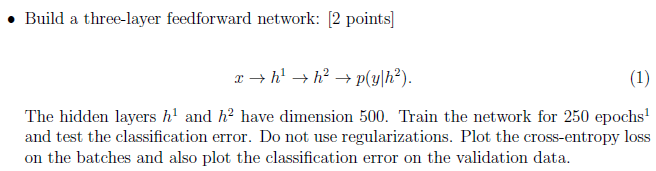

### **Build the Neural Network using Keras layers** (*No regularizers*)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 250)               196250    
                                                                 
 dense_19 (Dense)            (None, 250)               62750     
                                                                 
 dense_20 (Dense)            (None, 10)                2510      
                                                                 
Total params: 261,510
Trainable params: 261,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3,verbose=1,min_delta=0.001)

In [ ]:
model.compile(optimizer='SGD', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=250, 
    steps_per_epoch=100,
    validation_data=val_dataset.repeat(), 
    validation_steps=25,callbacks=[callback])

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 6s 30ms/step - loss: 1.9944 - accuracy: 0.4840 - val_loss: 1.6745 - val_accuracy: 0.7028
Epoch 2/250
100/100 [==============================] - 5s 53ms/step - loss: 1.3935 - accuracy: 0.7503 - val_loss: 1.0957 - val_accuracy: 0.7995
Epoch 3/250
100/100 [==============================] - 5s 52ms/step - loss: 0.9488 - accuracy: 0.8054 - val_loss: 0.7755 - val_accuracy: 0.8331
Epoch 4/250
100/100 [==============================] - 5s 52ms/step - loss: 0.7193 - accuracy: 0.8372 - val_loss: 0.6256 - val_accuracy: 0.8518
Epoch 5/250
100/100 [==============================] - 5s 51ms/step - loss: 0.6002 - accuracy: 0.8550 - val_loss: 0.5360 - val_accuracy: 0.8681
Epoch 6/250
100/100 [==============================] - 3s 30ms/step - loss: 0.5320 - accuracy: 0.8644 - val_loss: 0.4782 - val_accuracy: 0.8786
Epoch 7/250
100/100 [==============================] - 5s 29ms/step - loss: 0.4839 - accuracy: 0.8746 - val_loss: 0.4444 - val_accuracy: 0.8830
Epoc

In [ ]:

model_history = history.history
model_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

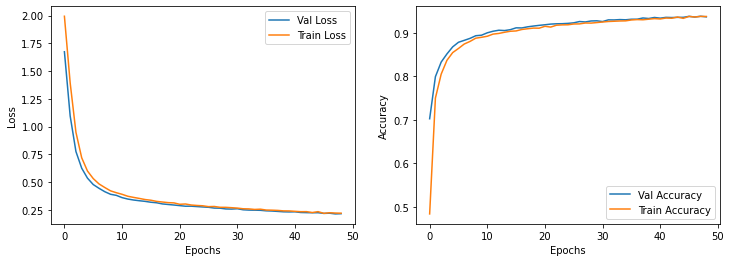

In [ ]:
plot_results(model_history).show()

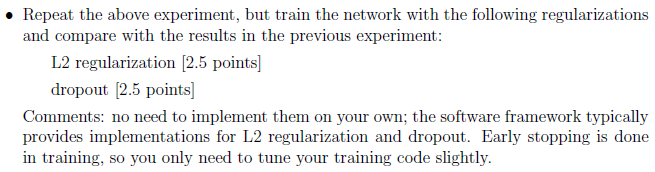

### **Let us first apply L2**

In [ ]:
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    tf.keras.layers.Dense(units=250, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
    tf.keras.layers.Dense(units=250, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
    tf.keras.layers.Dense(units=10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))
])

model_l2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 250)               196250    
                                                                 
 dense_40 (Dense)            (None, 250)               62750     
                                                                 
 dense_41 (Dense)            (None, 10)                2510      
                                                                 
Total params: 261,510
Trainable params: 261,510
Non-trainable params: 0
_________________________________________________________________


As you see in the previous case, under early stopping condition, the model stopped training at the $49^{th}$ epoch. Let us now remove this early stopping condition and apply L2 regularization for 50 epochs and compare the performance of the two models.

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3,verbose=1)

model_l2.compile(optimizer='SGD', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_l2 = model_l2.fit(
    train_dataset.repeat(), 
    epochs=50, 
    steps_per_epoch=100,
    validation_data=val_dataset.repeat(), 
    validation_steps=25)

model_l2_history = history_l2.history

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 6s 32ms/step - loss: 8.4040 - accuracy: 0.4225 - val_loss: 7.9763 - val_accuracy: 0.6954
Epoch 2/50
100/100 [==============================] - 5s 51ms/step - loss: 7.5895 - accuracy: 0.7430 - val_loss: 7.1872 - val_accuracy: 0.8010
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 6.9287 - accuracy: 0.8083 - val_loss: 6.6595 - val_accuracy: 0.8393
Epoch 4/50
100/100 [==============================] - 5s 52ms/step - loss: 6.4976 - accuracy: 0.8374 - val_loss: 6.3050 - val_accuracy: 0.8538
Epoch 5/50
100/100 [==============================] - 5s 51ms/step - loss: 6.1887 - accuracy: 0.8531 - val_loss: 6.0249 - val_accuracy: 0.8655
Epoch 6/50
100/100 [==============================] - 3s 31ms/step - loss: 5.9246 - accuracy: 0.8633 - val_loss: 5.7838 - val_accuracy: 0.8750
Epoch 7/50
100/100 [==============================] - 5s 31ms/step - loss: 5.6973 - accuracy: 0.8691 - val_loss: 5.5644 - val_accuracy: 0.8808
Epoch 8/50

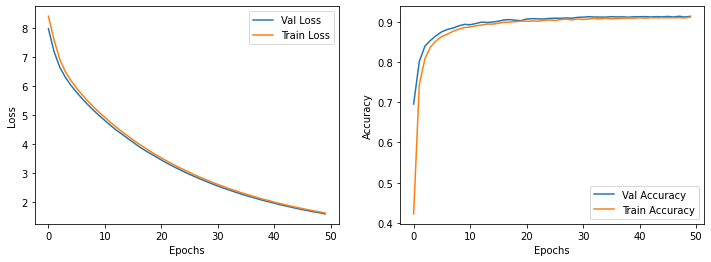

In [ ]:
plot_results(model_l2_history).show()

### **second we try with Dropout**

In [ ]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model_dropout.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 250)               196250    
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_43 (Dense)            (None, 250)               62750     
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                2510      
                                                                 
Total params: 261,510
Trainable params: 261,510
Non-t

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3,verbose=1)

model_dropout.compile(optimizer='SGD', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_dropout = model_dropout.fit(
    train_dataset.repeat(), 
    epochs=50, 
    steps_per_epoch=100,
    validation_data=val_dataset.repeat(), 
    validation_steps=25)

model_dropout_history = history_dropout.history

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 6s 34ms/step - loss: 2.0732 - accuracy: 0.3343 - val_loss: 1.7299 - val_accuracy: 0.6837
Epoch 2/50
100/100 [==============================] - 5s 55ms/step - loss: 1.5261 - accuracy: 0.6447 - val_loss: 1.1594 - val_accuracy: 0.7859
Epoch 3/50
100/100 [==============================] - 5s 54ms/step - loss: 1.1004 - accuracy: 0.7281 - val_loss: 0.8164 - val_accuracy: 0.8302
Epoch 4/50
100/100 [==============================] - 5s 54ms/step - loss: 0.8593 - accuracy: 0.7728 - val_loss: 0.6468 - val_accuracy: 0.8496
Epoch 5/50
100/100 [==============================] - 6s 56ms/step - loss: 0.7301 - accuracy: 0.7977 - val_loss: 0.5490 - val_accuracy: 0.8639
Epoch 6/50
100/100 [==============================] - 3s 33ms/step - loss: 0.6539 - accuracy: 0.8124 - val_loss: 0.4920 - val_accuracy: 0.8756
Epoch 7/50
100/100 [==============================] - 5s 33ms/step - loss: 0.5966 - accuracy: 0.8278 - val_loss: 0.4507 - val_accuracy: 0.8827
Epoch 8/50

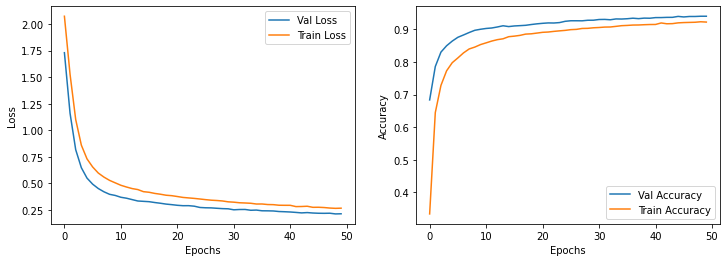

In [ ]:
plot_results(model_dropout_history).show()

In [ ]:
## Model Comparison
error1 = (1-model_history['val_accuracy'][-1])*100
error2 = (1-model_l2_history['val_accuracy'][-1])*100
error3 = (1-model_dropout_history['val_accuracy'][-1])*100

print("The Classification Error on the Validation set for the first model = {:.2f}".format(error1)+"%")
print("The Classification Error on the Validation set for the L2-Regularization model {:.2f}".format(error2)+"%")
print("The Classification Error on the Validation set for the Dropout model {:.2f}".format(error3)+"%")

The Classification Error on the Validation set for the first model = 6.30%
The Classification Error on the Validation set for the L2-Regularization model 8.66%
The Classification Error on the Validation set for the Dropout model 5.99%


### **As we can see, out of the Three models, The model with dropout Regularization performs the best (keeping all other factors same for an unbiased comparison) as compared to the other 2 models, interms of validation error.**

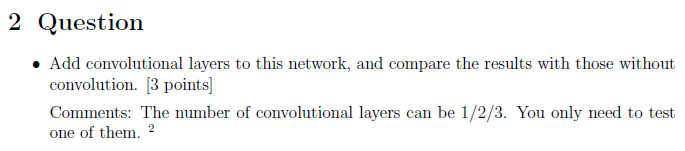

**Let us now add a convolution layer to this Dropout model and see if there is any change in the model's performance.**

In [ ]:
model_dropout_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, (3,3), padding='same', activation="relu",input_shape=(28, 28,1)), # conv layer 1
    #tf.keras.layers.Conv2D(5, (3,3), padding='valid',strides=(2,2), activation="relu"),# conv layer 2
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),# conv layer 2

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model_dropout_conv.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 3)        0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 588)               0         
                                                                 
 dense_63 (Dense)            (None, 250)               147250    
                                                                 
 dropout_18 (Dropout)        (None, 250)               0         
                                                                 
 dense_64 (Dense)            (None, 250)               62750     
                                                     

In [ ]:
model_dropout_conv.compile(optimizer='SGD', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_dropout_conv = model_dropout_conv.fit(
    train_dataset.repeat(), 
    epochs=50, 
    steps_per_epoch=100,
    validation_data=val_dataset.repeat(), 
    validation_steps=25)

model_dropout_conv_history = history_dropout_conv.history

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 16s 137ms/step - loss: 2.2785 - accuracy: 0.1509 - val_loss: 2.2098 - val_accuracy: 0.3424
Epoch 2/50
100/100 [==============================] - 16s 160ms/step - loss: 2.0539 - accuracy: 0.4050 - val_loss: 1.6756 - val_accuracy: 0.7034
Epoch 3/50
100/100 [==============================] - 16s 159ms/step - loss: 1.3023 - accuracy: 0.6488 - val_loss: 0.7692 - val_accuracy: 0.8163
Epoch 4/50
100/100 [==============================] - 16s 159ms/step - loss: 0.7907 - accuracy: 0.7606 - val_loss: 0.5075 - val_accuracy: 0.8658
Epoch 5/50
100/100 [==============================] - 16s 157ms/step - loss: 0.6148 - accuracy: 0.8116 - val_loss: 0.4125 - val_accuracy: 0.8878
Epoch 6/50
100/100 [==============================] - 14s 135ms/step - loss: 0.5253 - accuracy: 0.8401 - val_loss: 0.3623 - val_accuracy: 0.8980
Epoch 7/50
100/100 [==============================] - 16s 136ms/step - loss: 0.4736 - accuracy: 0.8562 - val_loss: 0.3306 - val_accuracy: 0.9

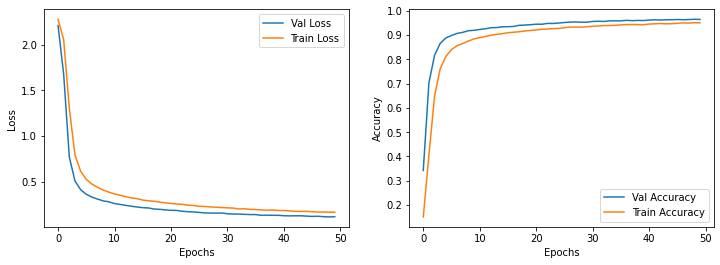

In [ ]:
plot_results(model_dropout_conv_history).show()

In [102]:
error4 = (1-model_dropout_conv_history['val_accuracy'][-1])*100

print("The Classification Error on the Validation set for the Dropout model {:.2f}".format(error3)+"%")
print("The Classification Error on the Validation set for the Dropout model with a Conv layer {:.2f}".format(error4)+"%")

The Classification Error on the Validation set for the Dropout model 5.99%
The Classification Error on the Validation set for the Dropout model with a Conv layer 3.60%


### **Clearly, Our model with an extra convolution layer performs even better than the previous dropout model.**

# **Hence Proved. This completes the Assignment**